In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime

In [2]:
df = pd.read_csv('Cab_Rides.csv')

In [3]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [4]:
df.shape

(1155, 7)

In [5]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
df.tail(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
def convert_time(column):
    y = []
    for x in df[column]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))
        
    df[column] = y

In [8]:
# Convert start date and end date columns to datetime format
column_date = df[['START_DATE*','END_DATE*']]

for x in column_date:
    convert_time(x)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [11]:
df['PURPOSE*'].mode()

0    Meeting
dtype: object

In [12]:
#Filling Missing values
df['PURPOSE*'].fillna('Meeting', inplace=True)

In [13]:
df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

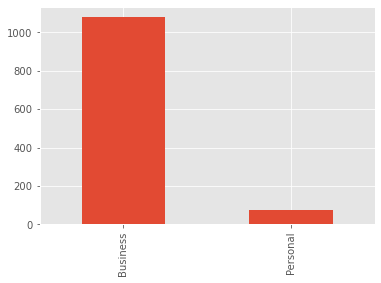

In [14]:
# Plot no. of trips in each category

df['CATEGORY*'].value_counts().plot(kind = 'bar');

In [15]:
#Creating another column Month

df['MONTH'] = df['START_DATE*'].dt.month
df['YEAR'] = df['START_DATE*'].dt.year
df['HOUR'] = df['START_DATE*'].dt.hour

In [16]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTH,YEAR,HOUR
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,12,2016,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12,2016,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12,2016,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12,2016,21
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12,2016,22


In [17]:
df['MONTH'].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: MONTH, dtype: int64

In [18]:
df['YEAR'].value_counts()

2016    1155
Name: YEAR, dtype: int64

Since the whole data is for the year 2016 we will drop year column

In [19]:
df = df.drop('YEAR', axis = 1)

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTH,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,14


In [22]:
#Creating anpther column Duration of ride in minutes

minutes = []
df['DURATION_IN_MINUTES'] = df['END_DATE*'] - df['START_DATE*']
for x in df['DURATION_IN_MINUTES']:
    minutes.append(x.seconds/60)
df['DURATION_IN_MINUTES'] = minutes
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTH,HOUR,DURATION_IN_MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,21,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,1,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,20,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,17,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,14,67.0


C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


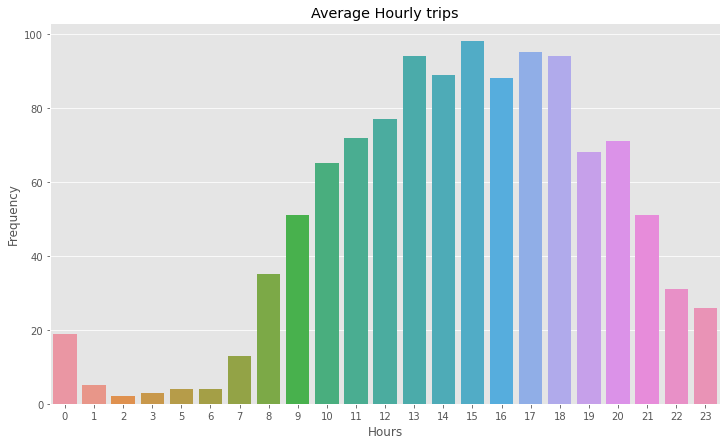

In [38]:
plt.figure(figsize = (12,7))
sns.countplot(df['HOUR'])
plt.title('Average Hourly trips')
plt.xlabel('Hours')
plt.ylabel('Frequency');

**From the above plot we can see that most no. of trips were from afternoon to evening**

C:\Users\Deepesh Asthana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


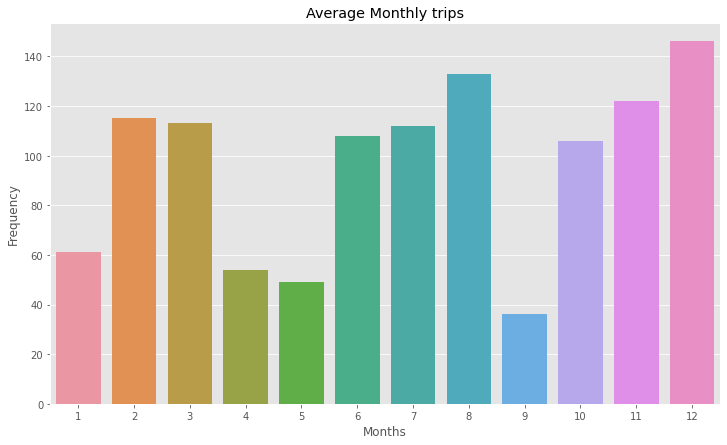

In [49]:
plt.figure(figsize = (12,7))
sns.countplot(df['MONTH'])
plt.title('Average Monthly trips')
plt.xlabel('Months')
plt.ylabel('Frequency');

In [47]:
# Calculating speed for every trip
df['DURATION_IN_HOURS'] = df['DURATION_IN_MINUTES']/60
df['SPEED_IN-MILES'] = df['MILES*']/df['DURATION_IN_HOURS']

In [48]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTH,HOUR,DURATION_IN_MINUTES,DURATION_IN_HOURS,SPEED_IN-MILES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,21,6.0,0.100000,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,1,12.0,0.200000,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,20,13.0,0.216667,21.818182
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,17,14.0,0.233333,20.434783
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,14,67.0,1.116667,56.875000


In [55]:
df.describe()

,MILES*,MONTH,HOUR,DURATION_IN_MINUTES,DURATION_IN_HOURS,SPEED_IN-MILES
count,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000,1155.000000
mean,10.566840,6.982684,14.696104,23.243290,0.387388,inf
std,21.579106,3.544915,4.575226,27.318277,0.455305,NaN
min,0.500000,1.000000,0.000000,0.000000,0.000000,3.910891
25%,2.900000,3.500000,12.000000,10.000000,0.166667,15.000000
50%,6.000000,7.000000,15.000000,16.000000,0.266667,21.081081
75%,10.400000,10.000000,18.000000,27.500000,0.458333,28.666667
max,310.300000,12.000000,23.000000,336.000000,5.600000,inf
